In [3]:
import numpy as np
import numpy.ma as ma
from uncertainties import ufloat, unumpy

import matplotlib.pyplot as plt
import seaborn as sns

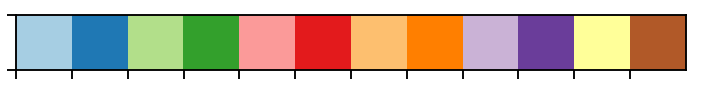

In [4]:
sns.set_context('talk')
sns.palplot(sns.color_palette("Paired"))

# Constants

In [21]:
C = 299792458 # Speed of light in [m/s]
H = ufloat(6.626070040E-34, 0.000000081E-34) # Planck's constant [Js]
HBAR = H/(2*np.pi) # Planck's constant [Js]
KB = ufloat(1.38064852E-23, 0.00000079E-23) # Boltzmann constant [J/K]

In [22]:
wavelength = 1064E-9 # Wavelengtn in [m]
gamma = 7.5E3 # linewidth in [Hz]
f_88 = ufloat(434829121311, 10)*1000 # [Hz] from Sansonetti2010.JPCRD.39.033103
f_86 = ufloat(434828957494, 10)*1000 # [Hz] from Sansonetti2010.JPCRD.39.033103
f_84 = ufloat(434828769718, 111)*1000 # [Hz] from Hui2015.CPB.24.1.013201

Gamma = 2*np.pi*gamma
omega_88 = 2*np.pi*f_88 # [Hz] from Sansonetti2010.JPCRD.39.033103
omega_86 = 2*np.pi*f_86 # [Hz] from Sansonetti2010.JPCRD.39.033103
omega_84 = 2*np.pi*f_84 # [Hz] from Hui2015.CPB.24.1.013201

# General Functions

In [108]:
def Udip(omega, omega_0, I):
    return -(3*np.pi*C**2)/(2*omega_0**3)*(Gamma/(omega_0-omega) + Gamma/(omega_0+omega))*I

def GammaSc(omega, omega_0, I):
    return (3*np.pi*C**2)/(2*HBAR*omega_0**3)*(omega/omega_0)**3*(Gamma/(omega_0-omega) + Gamma/(omega_0+omega))**2*I

def waist(z, z0, w0):
    zR = np.pi*w0**2/wavelength
    return np.sqrt(w0*(1+(z-z0)**2/zR**2))

def peak_intensity_circular(P, w0):
    return (2*P/np.pi/w0**2)

def intensity_circular(P, w0, z, z0, r):
    I0 = peak_intensity_circular(P, w0)
    wz = waist(z, z0, z0)
    return I0*(w0/wz)**2*np.exp(-2*r**2/wz**2)

# Simple, two-level calculations

### Trapping potential and scattering rate

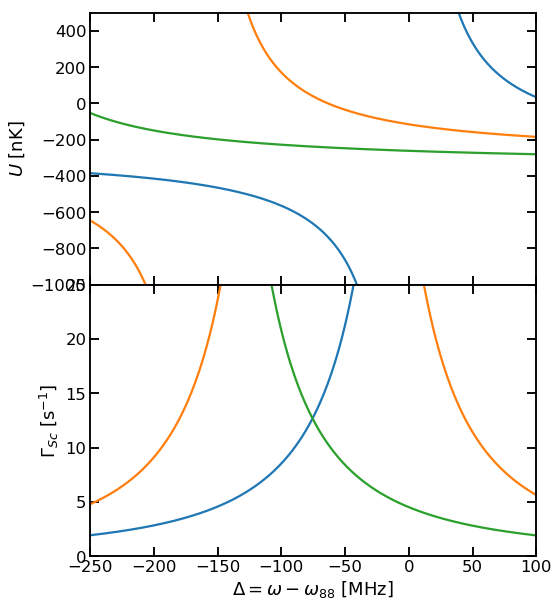

In [137]:
num_points = 501

# Plot options
[xmin, xmax] = [-250, 100]
[Umin, Umax] = [-1000, 500]
[Gmin, Gmax] = [0, 25]

# Trap parameters
delta_T = -1.5E9*np.ones(num_points)
f_T = f_88 + delta_T
omega_T = 2*np.pi*f_T
I_t = peak_intensity_circular(200E-6, 60E-6)

# Cancel parameters
delta_C = np.linspace(xmin*1E6, xmax*1E6, 501)
f_C = f_88 + delta_C
omega_C = 2*np.pi*f_C
I_c = peak_intensity_circular(15E-6, 60E-6)

# Plotting
[fig, axs] = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(8,10))

# Trapping potential
Utrap = Udip(omega_T, omega_88, I_t)
Ucancel = Udip(omega_C, omega_88, I_c)
U = (Utrap+Ucancel)/KB*1E9
U = ma.masked_where((U < Umin-10) | (U > Umax+10), U)
axs[0].plot(delta_C/1E6, unumpy.nominal_values(U), label=r'$^{88}$Sr')

Utrap = Udip(omega_T, omega_86, I_t)
Ucancel = Udip(omega_C, omega_86, I_c)
U = (Utrap+Ucancel)/KB*1E9
U = ma.masked_where((U < Umin-10) | (U > Umax+10), U)
axs[0].plot(delta_C/1E6, unumpy.nominal_values(U), label=r'$^{86}$Sr')

Utrap = Udip(omega_T, omega_84, I_t)
Ucancel = Udip(omega_C, omega_84, I_c)
U = (Utrap+Ucancel)/KB*1E9
U = ma.masked_where((U < Umin-10) | (U > Umax+10), U)
axs[0].plot(delta_C/1E6, unumpy.nominal_values(U), label=r'$^{84}$Sr')

# Scattering rate
G = GammaSc(omega_laser, omega_88, It)
axs[1].plot(delta_C/1E6, unumpy.nominal_values(G), label=r'$^{88}$Sr')

G = GammaSc(omega_laser, omega_86, It)
axs[1].plot(delta_C/1E6, unumpy.nominal_values(G), label=r'$^{86}$Sr')

G = GammaSc(omega_laser, omega_84, It)
axs[1].plot(delta_C/1E6, unumpy.nominal_values(G), label=r'$^{84}$Sr')

# Axis settings
for ax in axs:
    axs[0].set_xlim(xmin, xmax)

axs[0].set_ylim(bottom=Umin, top=Umax)
axs[1].set_ylim(bottom=Gmin, top=Gmax)
#axs[1].set_yscale('log')

# Tick settings
for ax in axs:
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='both',direction='in')

# Axes labels
plt.xlabel(r'$\Delta=\omega-\omega_{88}$ [MHz]')
axs[0].set_ylabel(r'$U$ [nK]')
axs[1].set_ylabel(r'$\Gamma_{Sc}$ [s$^{-1}$]')

# Subplot spacing
fig.subplots_adjust(hspace=0)
plt.show()